[[100.         500.           2.23606798]
 [100.         300.           2.82842712]
 [200.         300.           2.23606798]
 [200.         500.           2.82842712]
 [300.         200.           2.23606798]
 [300.         400.           2.23606798]
 [300.         100.           2.82842712]
 [400.         300.           2.23606798]
 [500.         100.           2.23606798]
 [500.         200.           2.82842712]]


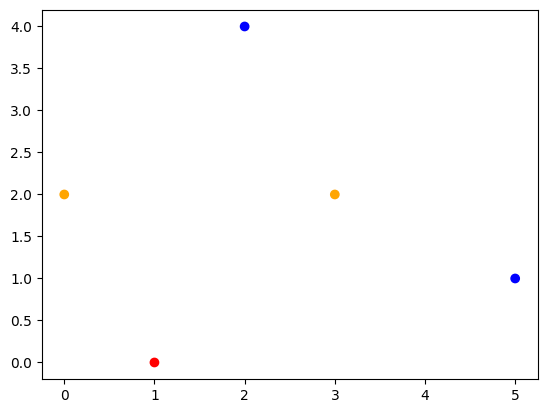

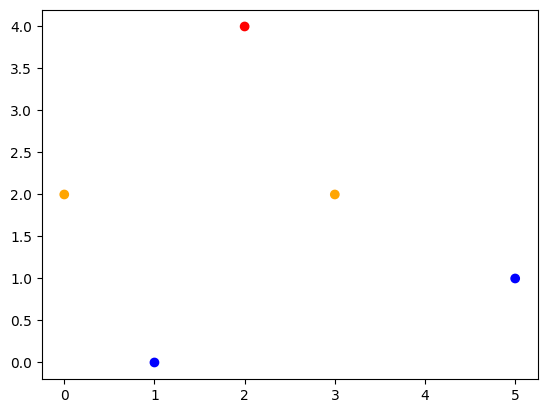

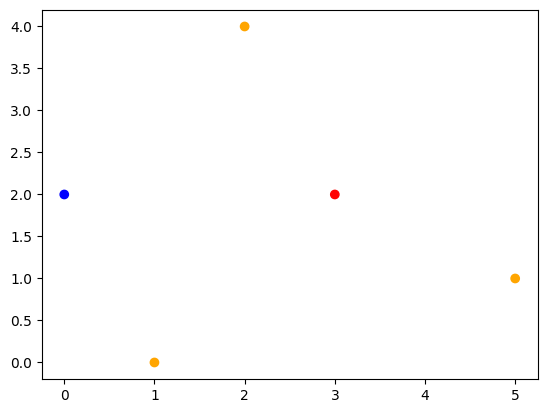

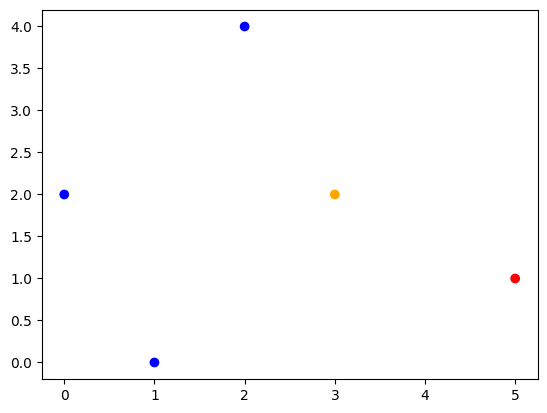

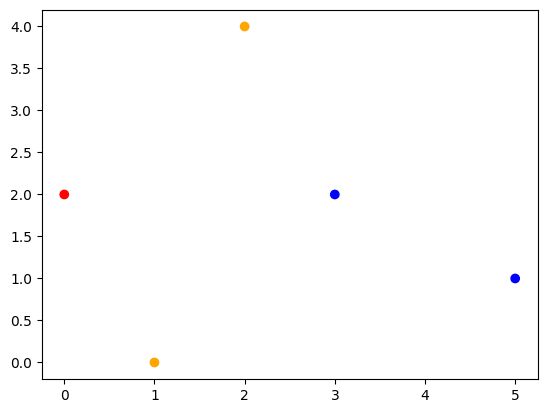

In [ ]:
import numpy as np
from scipy.spatial import cKDTree

max_neighbors = 3
max_distance = 3.0

# See what happens to the last scatter plot with this configuration
# max_distance = 3.01

# THE FIRST COLUMN IS AN ID, THE REMAINING COLUMNS ARE N-DIMENSIONAL COORDINATES.
data = np.array(
    [
        [100, 1.0, 0.0],
        [200, 2.0, 4.0],
        [300, 3.0, 2.0],
        [400, 5.0, 1.0],
        [500, 0.0, 2.0],
    ],
    dtype=np.float64,
)

# With this slicing, the "customer_id" is left out, it will be retrieved later based on
# indexing.
labels = data[:, 0]
coords = data[:, 1:]
tree = cKDTree(coords)
distances, indices = tree.query(
    coords,
    # Indices of the nearest neighbors starting at 1 (1 is the closest neighbor). Since
    # the data `query` is being fed is the same as the data used in the tree
    # instantiation, the absolute nearest neighbor for any given set of coordinates is
    # itself, this is why the list starts at 2.
    k=list(range(2, max_neighbors + 2)),
    # Use p=1 for Manhattan Distance, p=2 for Euclidean Distance.
    p=2,
    # This bound is open.
    distance_upper_bound=max_distance,
    # Number of cores to use, -1 means all of them.
    workers=-1,
)

ans = np.vstack(
    (
        # This first array holds the index of the origin coordinate the neighbors were
        # computed from. It is an enumeration from 0 to the total number of coordinates
        # but each element is repeated `max_neighbors` times,
        # e.g. [0, 0, 0, 1, 1, 1, 2, 2, 2, ...] for `max_neighbors = 3`.
        np.repeat(np.arange(0, len(coords)), max_neighbors),
        indices.ravel(),
        distances.ravel(),
    )
).T

# When `max_distance` reduces the number of nearest neighbors below `max_neighbors`, the
# remaining slots get filled with the length of the coordinates as the index and
# infinity as the distance to them. Knowing that, it becomes easy to filter them out.
ans = ans[ans[:, 1] < len(coords)]
ans[:, :2] = labels[ans[:, :2].astype(np.uint64)]


print(ans)

from matplotlib import pyplot as plt

for label in labels:
    fig, ax = plt.subplots()
    neighbors = ans[ans[:, 0] == label, 1]
    colors = [
        "red" if i == label else "orange" if i in neighbors else "blue" for i in labels
    ]
    ax.scatter(coords[:, 0], coords[:, 1], c=colors)